In [2]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

from tensorflow import keras

#   패키지 설치
#   pip install tensorflow
#   pip install keras

# (패션 MNIST)데이터
- 0: 티셔츠, 1: 바지, 2: 스웨터, 3: 드레스, 4: 코트
- 5: 샌들, 6: 셔츠, 7: 스니커즈, 8: 가방, 9: 부츠

+ 데이터: 70000개

### 데이터 분할(훈련 + 테스트)

In [3]:
(xtrain, ytrain), (xtest, ytest) =\
    keras.datasets.fashion_mnist.load_data()

### 데이터 스케일링(정규화) - 합성곱

In [4]:
xtrain_scaled = xtrain.reshape(-1, 28, 28, 1) / 255
xtest_scaled = xtest.reshape(-1, 28, 28, 1) / 255

### 데이터 분할(훈련 + 검증)

In [5]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
 
    xtrain_scaled, ytrain             # x: 특성, y: 타겟
    , test_size = 0.2       # 검증 데이터 비율(0~1)
#    , stratify = target      # 훈련 데이터 클래스 비율 = 검증 데이터 클래스 비율
    , random_state = 42    # 랜덤 시드
    )
    
print(Xtrain.shape, Xtest.shape)    # (훈련/검증 데이터 샘플 갯수, 특성 갯수)

(48000, 28, 28, 1) (12000, 28, 28, 1)


# 모델 생성

### 합성곱 신경망

In [6]:
model = keras.Sequential(name='CNN')    # 모델 생성


# 합성곱 층 추가
model.add(
    keras.layers.Conv2D(
        32  # 필터(도장) 개수
        , kernel_size = 3    # 필터(도장) 크기
        , activation='relu'    # 활성화 함수(소프트맥스/시그모이드/렐루)
#        , padding = 'valid'    # 패딩(밸리드, 세임)
        , padding = 'same'    # 패딩(밸리드, 세임)
        , strides = 1    # 스트라이드
        , input_shape = (28, 28, 1)
        )
)

# 풀링 층 추가(최대)
model.add(keras.layers.MaxPooling2D(2)) # 필터 크기

# 풀링 층 추가(평균)
# keras.layers.AveragePooling2D(
#     2 # 필터 크기
#     )

In [7]:
# 합성곱 층 추가
model.add(
    keras.layers.Conv2D(
        64  # 필터(도장) 개수
        , kernel_size = 3    # 필터(도장) 크기
        , activation='relu'    # 활성화 함수(소프트맥스/시그모이드/렐루)
#        , padding = 'valid'    # 패딩(밸리드, 세임)
        , padding = 'same'    # 패딩(밸리드, 세임)
        , strides = 1    # 스트라이드
    )
)

# 풀링 층 추가(최대)
model.add(
    keras.layers.MaxPooling2D(
        2 # 필터 크기
    )
)

### 심층 신경망

In [8]:
# 층 추가(다차원 데이터 → 1차원 데이터)
model.add(keras.layers.Flatten())

# 은닉층 추가
model.add(
    keras.layers.Dense(
    100
    , activation = 'relu'    # 활성화 함수(렐루)
    )
)

# 층 추가(드롭아웃)
model.add( keras.layers.Dropout(0.4) )    # 0 ~ 1

# 출력층 추가
model.add(
    keras.layers.Dense(
    10
    , activation = 'softmax'    # 활성화 함수(소프트맥스/시그모이드/렐루)
    )
)

In [9]:
# 모델 정보
model.summary()
# 층 이름(종류)    출력 크기(미니 배치 샘플 개수, 뉴런 개수)    파라미터 개수 = ( (특성)뉴런 개수+1 ) X 뉴런 개수
# 전체 파라미터 개수
# 훈련 파라미터 개수
# 훈련X 파라미터 개수

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               313700  

In [10]:
# 모델 정보(시각화)
keras.utils.plot_model(
    model    # 모델 이름
    , show_shapes = True    # 데이터 크기 추가
    )

# 층 이름 ｜ 입력 데이터 크기
#   종류  ｜ 출력 데이터 크기

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 모델 설정＆학습

In [11]:
#(옵티마이저)변수 = 옵티마이저

# 모델 설정
model.compile(
    loss = 'sparse_categorical_crossentropy'    # 손실 함수(원-핫 인코딩 + 이진/다중 분류)
#   loss = 'binary/categorical_crossentropy'           # 손실 함수(이진/다중 분류)
    , metrics = 'accuracy'                             # 성능 지표(정확도)
#    , optimizer = (옵티마이저)변수
   , optimizer = 'adam'
    )

# 최적화 값 저장
mc = keras.callbacks.ModelCheckpoint(
    'best-cnn-model.h5'                  # 모델
    , monitor = 'val_loss'         # 성능 지표
    , save_weights_only = False    # 전체(True: 가중치＆절편)
    , save_best_only = True        # 가장 낮은 검증 점수  
    )

# 조기 종료
es = keras.callbacks.EarlyStopping(
    monitor = 'val_loss'    # 성능 지표
    , patience = 2          # 성능 지표가 향상 되지 않는 최대 에포크 횟수
   , restore_best_weights = True    # 최적화 가중치 복원
    )

# early_stopping_cb.stopped_epoch    # 조기 종료 에포크 횟수

# 모델 학습(경사 하강법)
history = model.fit(
    Xtrain, Ytrain
    , epochs = 20
    , batch_size = None    # 미니배치 샘플 개수(32)
    , verbose = 1          # 훈련 과정( 0: 생략, 2: 진행 막대 생략 )
    , validation_data = (Xtest, Ytest)    # 검증 데이터 - 손실, 정확도 추가
    , callbacks = [mc, es]    # 콜백
    )

history.history.keys()    # 성능 지표 목록(손실, 정확도)

Epoch 1/20
1500/1500 [==============================] - 103s 63ms/step - loss: 0.5387 - accuracy: 0.8078 - val_loss: 0.3370 - val_accuracy: 0.8760
Epoch 2/20
1500/1500 [==============================] - 72s 48ms/step - loss: 0.3553 - accuracy: 0.8719 - val_loss: 0.2767 - val_accuracy: 0.8968
Epoch 3/20
1500/1500 [==============================] - 69s 46ms/step - loss: 0.3046 - accuracy: 0.8903 - val_loss: 0.2624 - val_accuracy: 0.9030
Epoch 4/20
1500/1500 [==============================] - 69s 46ms/step - loss: 0.2721 - accuracy: 0.9001 - val_loss: 0.2366 - val_accuracy: 0.9117
Epoch 5/20
1500/1500 [==============================] - 69s 46ms/step - loss: 0.2430 - accuracy: 0.9103 - val_loss: 0.2558 - val_accuracy: 0.9087
Epoch 6/20
1500/1500 [==============================] - 69s 46ms/step - loss: 0.2256 - accuracy: 0.9174 - val_loss: 0.2224 - val_accuracy: 0.9193
Epoch 7/20
1500/1500 [==============================] - 69s 46ms/step - loss: 0.2090 - accuracy: 0.9219 - val_loss: 0.2233 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 그래프

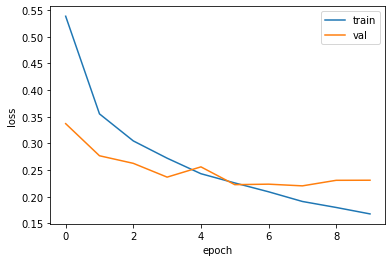

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['train', 'val'])

plt.show()

In [13]:
model.evaluate(Xtest, Ytest)    # 검증 데이터 - 손실 함수, 성능 지표

375/375 [==============================] - 8s 11ms/step - loss: 0.2201 - accuracy: 0.9237


[0.2201475203037262, 0.9237499833106995]

# 모델 예측

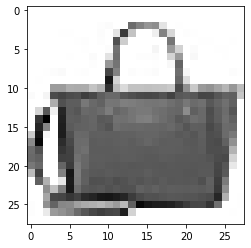

In [14]:
# 검증 데이터 - 첫 번째 샘플
plt.imshow(Xtest[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [15]:
pred = model.predict(Xtest[0:1])

pred

1/1 [==============================] - 0s 157ms/step


array([[9.2108240e-14, 6.0243458e-26, 1.4165699e-18, 4.5489407e-19,
        1.3565729e-16, 5.5897272e-18, 4.4351840e-18, 8.2702292e-17,
        1.0000000e+00, 3.7826729e-19]], dtype=float32)

### 그래프

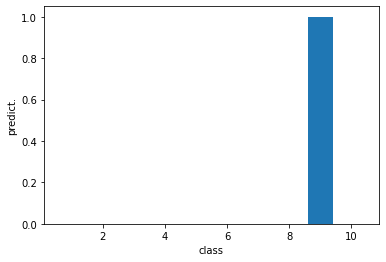

In [16]:
plt.bar(range(1, 11), pred[0])
plt.xlabel('class')
plt.ylabel('predict.')
plt.show()

In [17]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']


print(classes[np.argmax(pred)])

가방


# 모델 평가

In [18]:

model.evaluate(xtest_scaled, ytest)    # 테스트 데이터 - 손실, 성능 지표(스케일링)


313/313 [==============================] - 4s 11ms/step - loss: 0.2387 - accuracy: 0.9176


[0.23873786628246307, 0.9175999760627747]